# Cooking Appliances

In this example, appliances with multiple preferences index and attributes are modeled.

To have a better understanding of RAMP features for modelling these category of appliances, two households are considered:

1. First household with a fixed lunch habit of eating soup everyday.
2. Second household with two lunch preferences: cooking soup or rice.

The number of user preferences can be specified through **"user_preference"** parameter when initializing a **User** instance.

In [1]:
# importing functions
from ramp import User,UseCase,calc_peak_time_range,yearly_pattern
import pandas as pd

### Creating a user category 

In [2]:
user_1 = User(
    user_name = "Household with single lunch habit",
    num_users = 1,
    user_preference = 1, # user_1 has only one lunch preference
)

user_2 = User(
    user_name = "Household with different lunch habit",
    num_users = 1,
    user_preference = 2, # user_2 has two lunch preferences
)

### Defining the cycles for cooking soup and rice 

for cooking soup it is assumed that the user needs 25 minutes divided into two parts:

| cycle         | power | time |
|---------------|-------|------|
| Boiling Water | 1200  | 5    |
| Cooking soup  | 750   | 20   |

for cooking rice it is assumed that the user needs 15 minutes divided into two parts:

| cycle         | power | time |
|---------------|-------|------|
| Boiling Water | 1200  | 5    |
| Cooking rice  | 600   | 10   |



In [3]:
# soup for lunch
soup_1 = user_1.add_appliance(
    name = "soup for lunch",
    power = 1200,
    func_time = 25,
    func_cycle = 25,
    thermal_p_var = 0.2,
    fixed_cycle = 1,
    window_1 = [12*60,15*60],
    p_11 = 1200,   # power of the first cycle
    t_11 = 5,      # time needed for the first cycle
    p_12 = 750,    # power of the second cycle
    t_12 = 20,     # time needed for the second cycle
    cw11 = [12*60,15*60]
)


As second user has two different preferences for lunch, we need to model this preferences and their characterisitics as two different appliances.

Each preference needs to be specified with the cooking energy needs like the power, functioning time and the duty cycles of the cooking process. 

More importantly, for each preference, the user needs to specify the index of preference by using **pref_index** parameter. In this example, soup is the first prefernce of the user (pref_index = 1), and rice is the second one (pref_index = 2).

In [4]:
# soup for lunch
soup_2 = user_2.add_appliance(
    name = "soup for lunch",
    power = 1200,
    func_time = 25,
    func_cycle = 25,
    thermal_p_var = 0.2,
    fixed_cycle = 1,
    pref_index = 1, # the first preference
    window_1 = [12*60,15*60],
    p_11 = 1200,   # power of the first cycle
    t_11 = 5,      # time needed for the first cycle
    p_12 = 750,    # power of the second cycle
    t_12 = 20,     # time needed for the second cycle
    cw11 = [12*60,15*60]
)



In [5]:
# rice for lunch
rice_2 = user_2.add_appliance(
    name = "rice for lunch",
    power = 1200,
    func_time = 15,
    func_cycle = 15,
    thermal_p_var = 0.2,
    pref_index = 2,  # the second preference
    fixed_cycle = 1,
    window_1 = [12*60,15*60],
    p_11 = 1200,   # power of the first cycle
    t_11 = 5,      # time needed for the first cycle
    p_12 = 600,    # power of the second cycle
    t_12 = 10,     # time needed for the second cycle
    cw11 = [12*60,15*60]
    
)

In [6]:
# you can have an overview of data inputs by usering User.export_to_dataframe method
user_lunch = UseCase(users=[user_1,user_2])
user_lunch.export_to_dataframe().T

,0,1,2
user_name,Household with single lunch habit,Household with different lunch habit,Household with different lunch habit
num_users,1,1,1
user_preference,1,2,2
name,soup for lunch,soup for lunch,rice for lunch
number,1,1,1
power,1200.0,1200.0,1200.0
num_windows,1,1,1
func_time,25,25,15
time_fraction_random_variability,0,0,0
func_cycle,25,25,15


### Generating a profile for some months

In [7]:
peak_time_range = calc_peak_time_range(
    user_list = user_lunch.users
)
year_behaviour = yearly_pattern()


In [8]:
# number of days
n_days = 90

# storing all the profiles for all the users
profiles = pd.DataFrame(index = pd.date_range(start = "2020-01-01",periods = 1440*n_days,freq="T"))

for user in user_lunch.users:
   
    # storing daily profiles for a user
    user_profiles = []
    for day in range(n_days):
        single_profile = user.generate_single_load_profile(
            prof_i = day, # the day to generate the profile
            peak_time_range = peak_time_range,
            Year_behaviour = year_behaviour
        )

        user_profiles.extend(single_profile)
        
    profiles[user.user_name] = user_profiles
        
    


As the second user has the probability of cooking rice for lunch, and lunch has a less energy intensive cooking cycle, it is expected to see that the user with fixed lunch meal has higher energy consumption in most of the cases.

<AxesSubplot:title={'center':'daily energy consumption'}>

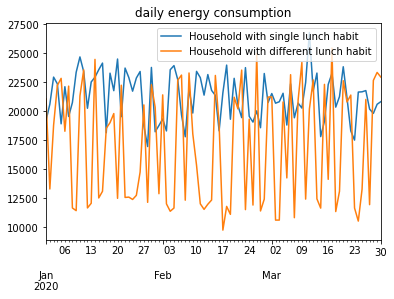

In [9]:
# daily energy consumption
profiles.resample("1d").sum().plot(title = "daily energy consumption")